# HoSt Predictive Model

In [1]:
import sys

assert sys.version_info >= (3, 7)

Correct Imports 

In [4]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:
import numpy as np

np.random.seed(42)

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade Prophet


If statsmodels is missing, run:
#   pip install statsmodels

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 1) Load and clean
df = (pd.read_csv("NetherlandsTrain.csv", parse_dates=["Datetime (UTC)"])
        .sort_values("Datetime (UTC)")
        .dropna(subset=["Price (EUR/MWhe)"])
        .set_index("Datetime (UTC)")
        .asfreq("h"))                 # guarantee an hourly index

y = df["Price (EUR/MWhe)"]


In [ ]:
# 2) Fit SARIMAX — daily seasonality (24 h)
#    (1,0,1) for local dynamics, (2,0,2,24) for 24-hour cycle
model   = SARIMAX(y,
                  order=(1, 0, 1),
                  seasonal_order=(2, 0, 2, 24),
                  enforce_stationarity=False,
                  enforce_invertibility=False)
results = model.fit(disp=False)

In [3]:
# 3) Predict every hour of 2024
start_2024 = "2024-01-01 00:00:00"
end_2024   = "2024-12-31 23:00:00"
pred_2024  = results.get_prediction(start=start_2024,
                                    end=end_2024,
                                    dynamic=False).predicted_mean

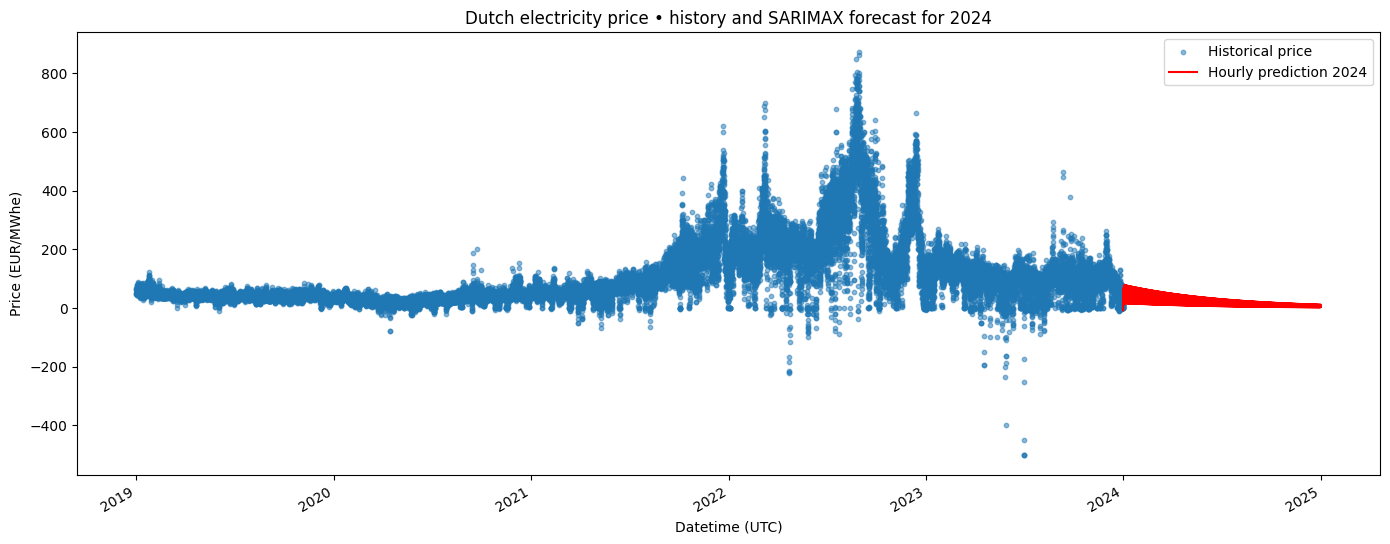

In [4]:
# 4) Plot: history + red 2024 forecast
plt.figure(figsize=(14, 6))
plt.scatter(y.index, y.values,
            s=10, alpha=0.5, label="Historical price")
plt.plot(pred_2024.index, pred_2024.values,
         color="red", linewidth=1.5,
         label="Hourly prediction 2024")

plt.xlabel("Datetime (UTC)")
plt.ylabel("Price (EUR/MWhe)")
plt.title("Dutch electricity price • history and SARIMAX forecast for 2024")
plt.legend()
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# ── 5. Peek at the first 11 hourly forecasts of 2024 ─────────
pred_slice = pred_2024.loc["2024-01-01 01:00:00" : "2024-01-01 11:00:00"]
print(pred_slice)

pred_slice = pred_2024.loc["2024-07-01 01:00:00" : "2024-07-01 11:00:00"]
print(pred_slice)

Series([], Freq: h, Name: pred, dtype: float64)
Series([], Freq: h, Name: pred, dtype: float64)
